In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter("ignore")

In [2]:
df = pd.read_csv('C:/Users/user/1/Downloads/NBA Players stats/all_seasons.csv')
pd.set_option('display.max_columns', None)
df.head()

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,0,Randy Livingston,HOU,22.0,193.04,94.800728,Louisiana State,USA,1996,2,42,64,3.9,1.5,2.4,0.3,0.042,0.071,0.169,0.487,0.248,1996-97
1,1,Gaylon Nickerson,WAS,28.0,190.50,86.182480,Northwestern Oklahoma,USA,1994,2,34,4,3.8,1.3,0.3,8.9,0.030,0.111,0.174,0.497,0.043,1996-97
2,2,George Lynch,VAN,26.0,203.20,103.418976,North Carolina,USA,1993,1,12,41,8.3,6.4,1.9,-8.2,0.106,0.185,0.175,0.512,0.125,1996-97
3,3,George McCloud,LAL,30.0,203.20,102.058200,Florida State,USA,1989,1,7,64,10.2,2.8,1.7,-2.7,0.027,0.111,0.206,0.527,0.125,1996-97
4,4,George Zidek,DEN,23.0,213.36,119.748288,UCLA,USA,1995,1,22,52,2.8,1.7,0.3,-14.1,0.102,0.169,0.195,0.500,0.064,1996-97


In [3]:
# print(plt.style.available)
plt.style.use('ggplot')

# Data Cleaning

### This dataset contains some individual players multiple times due to the collection of their statistics every year. Initially, we will analyze the NBA over the years, and secondly, we will transform the dataset to represent NBA player stats in a way that each player exists in the dataset only once."

In [4]:
df.shape

(12844, 22)

In [5]:
df.drop('Unnamed: 0', axis = 1, inplace = True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12844 entries, 0 to 12843
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   player_name        12844 non-null  object 
 1   team_abbreviation  12844 non-null  object 
 2   age                12844 non-null  float64
 3   player_height      12844 non-null  float64
 4   player_weight      12844 non-null  float64
 5   college            12844 non-null  object 
 6   country            12844 non-null  object 
 7   draft_year         12844 non-null  object 
 8   draft_round        12844 non-null  object 
 9   draft_number       12844 non-null  object 
 10  gp                 12844 non-null  int64  
 11  pts                12844 non-null  float64
 12  reb                12844 non-null  float64
 13  ast                12844 non-null  float64
 14  net_rating         12844 non-null  float64
 15  oreb_pct           12844 non-null  float64
 16  dreb_pct           128

In [7]:
df.isnull().sum()

player_name          0
team_abbreviation    0
age                  0
player_height        0
player_weight        0
college              0
country              0
draft_year           0
draft_round          0
draft_number         0
gp                   0
pts                  0
reb                  0
ast                  0
net_rating           0
oreb_pct             0
dreb_pct             0
usg_pct              0
ts_pct               0
ast_pct              0
season               0
dtype: int64

In [8]:
df.nunique()

player_name          2551
team_abbreviation      36
age                    27
player_height          30
player_weight         157
college               357
country                82
draft_year             48
draft_round             9
draft_number           76
gp                     85
pts                   319
reb                   153
ast                   115
net_rating            772
oreb_pct              216
dreb_pct              352
usg_pct               348
ts_pct                563
ast_pct               483
season                 27
dtype: int64

### Exploring the features

In [9]:
print(df['draft_year'].value_counts())
print("")
print(df['draft_round'].value_counts())
print("")
print(df['draft_number'].value_counts())

Undrafted    2358
1998          454
2003          435
2005          427
2008          422
1996          406
2001          404
2009          395
2011          374
2004          371
1999          366
2000          365
2007          353
1997          345
2006          331
1995          328
2012          327
2002          325
2013          316
2010          307
2014          297
1994          273
2015          273
2017          254
2016          241
2018          240
1992          232
2019          215
1993          210
1990          162
2020          153
1991          149
1988          127
1989          123
2021          104
1987           90
1985           86
1986           52
1984           49
2022           47
1983           22
1981           16
1982           11
1980            3
1979            3
1963            1
1976            1
1978            1
Name: draft_year, dtype: int64

1            7351
2            3032
Undrafted    2411
3              20
4              12
0             

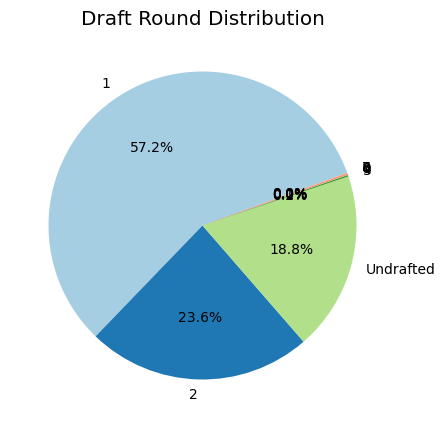

In [10]:
draft_round_counts = df['draft_round'].value_counts()

# Create a pie chart with labels
plt.figure(figsize=(5, 5))
colors = plt.cm.Paired(range(len(draft_round_counts)))

pie_chart = plt.pie(draft_round_counts, labels=draft_round_counts.index, autopct='%1.1f%%', startangle=20, colors=colors)
plt.title('Draft Round Distribution')

# Add labels to each wedge
for text in pie_chart[1]:
    text.set_size(10)

plt.show()

In [11]:
# Turn these variables into numerical : 
df['draft_round'] = df['draft_round'].replace('Undrafted', 0)
# df['draft_year'] = df['draft_year'].replace('Undrafted', 0)
df['draft_number'] = df['draft_number'].replace('Undrafted', 0)

df['draft_round'] = df['draft_round'].astype(int)
# df['draft_year'] = df['draft_year'].astype(int)
df['draft_number'] = df['draft_number'].astype(int)

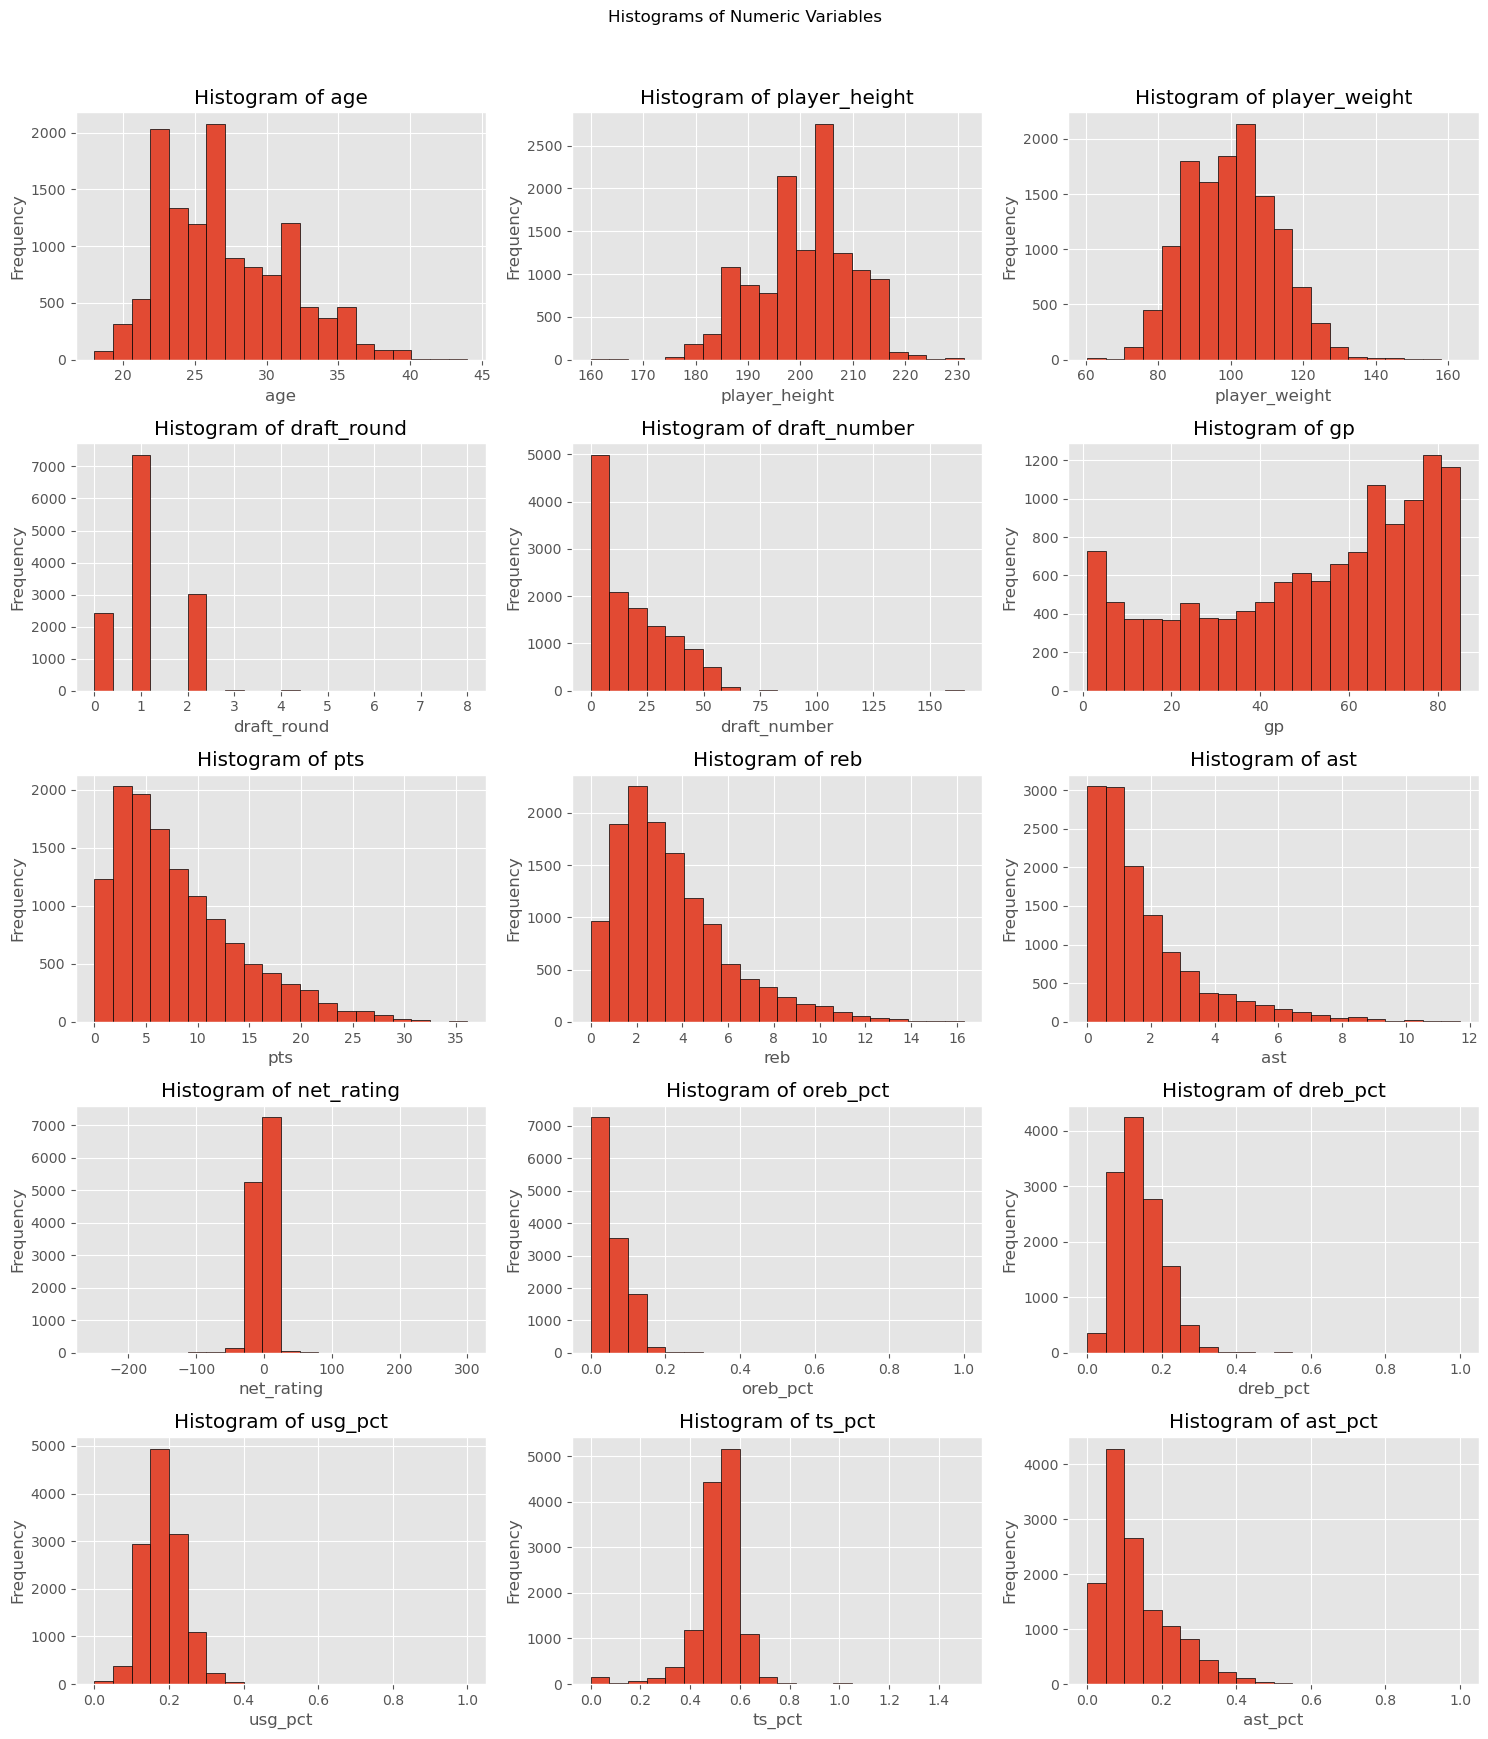

In [12]:
numeric_columns = df.select_dtypes(include='number')

# Create subplots with 7 rows and 3 columns
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 17))
fig.suptitle('Histograms of Numeric Variables', y=1.02)

# Flatten the axes to iterate over them
axes = axes.flatten()

# Iterate over numeric columns and create histograms
for i, column in enumerate(numeric_columns.columns):
    axes[i].hist(numeric_columns[column], bins=20, edgecolor='black')
    axes[i].set_title(f'Histogram of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

# Hide any remaining empty subplots
#for i in range(len(numeric_columns.columns), len(axes)):
#    axes[i].axis('off')

plt.tight_layout()
plt.show()

In [13]:
df.describe()

,age,player_height,player_weight,draft_round,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
count,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000
mean,27.045313,200.555097,100.263279,1.059172,17.774914,51.154158,8.212582,3.558486,1.824681,-2.226339,0.054073,0.140646,0.184641,0.513138,0.131595
std,4.339211,9.111090,12.426628,0.683223,16.803276,25.084904,6.016573,2.477885,1.800840,12.665124,0.043335,0.062513,0.053545,0.101724,0.094172
min,18.000000,160.020000,60.327736,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-250.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,193.040000,90.718400,1.000000,3.000000,31.000000,3.600000,1.800000,0.600000,-6.400000,0.021000,0.096000,0.149000,0.482000,0.066000
50%,26.000000,200.660000,99.790240,1.000000,14.000000,57.000000,6.700000,3.000000,1.200000,-1.300000,0.040000,0.130500,0.181000,0.525000,0.103000
75%,30.000000,208.280000,108.862080,1.000000,29.000000,73.000000,11.500000,4.700000,2.400000,3.200000,0.083000,0.179000,0.217000,0.563000,0.179000
max,44.000000,231.140000,163.293120,8.000000,165.000000,85.000000,36.100000,16.300000,11.700000,300.000000,1.000000,1.000000,1.000000,1.500000,1.000000


In [14]:
df.corr()

,age,player_height,player_weight,draft_round,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
age,1.000000,-0.007904,0.063561,0.007027,-0.037479,0.057442,0.011353,0.037386,0.092359,0.092896,-0.055228,0.018774,-0.113882,0.025245,0.069029
player_height,-0.007904,1.000000,0.822141,0.082086,-0.002585,0.004963,-0.055284,0.424220,-0.442781,-0.003074,0.589538,0.614273,-0.104011,0.076797,-0.608696
player_weight,0.063561,0.822141,1.000000,0.081907,-0.004572,0.022828,-0.025023,0.438112,-0.371675,0.003547,0.599511,0.605639,-0.065811,0.070992,-0.521939
draft_round,0.007027,0.082086,0.081907,1.000000,0.869180,0.098990,0.038062,0.046101,0.009065,0.003438,0.042997,0.027136,0.011489,0.043749,-0.023455
draft_number,-0.037479,-0.002585,-0.004572,0.869180,1.000000,-0.022233,-0.157892,-0.133272,-0.111977,-0.031084,0.020016,-0.050305,-0.108530,-0.008643,-0.063516
gp,0.057442,0.004963,0.022828,0.098990,-0.022233,1.000000,0.536003,0.471405,0.382726,0.248412,-0.014763,0.067911,0.147248,0.367876,0.131720
pts,0.011353,-0.055284,-0.025023,0.038062,-0.157892,0.536003,1.000000,0.624509,0.664320,0.215199,-0.125164,0.055669,0.641469,0.373439,0.337339
reb,0.037386,0.424220,0.438112,0.046101,-0.133272,0.471405,0.624509,1.000000,0.247841,0.187820,0.407960,0.611899,0.232968,0.313451,-0.062654
ast,0.092359,-0.442781,-0.371675,0.009065,-0.111977,0.382726,0.664320,0.247841,1.000000,0.162865,-0.337970,-0.192146,0.396505,0.174494,0.803150
net_rating,0.092896,-0.003074,0.003547,0.003438,-0.031084,0.248412,0.215199,0.187820,0.162865,1.000000,0.055761,0.047928,0.026575,0.313251,0.063809


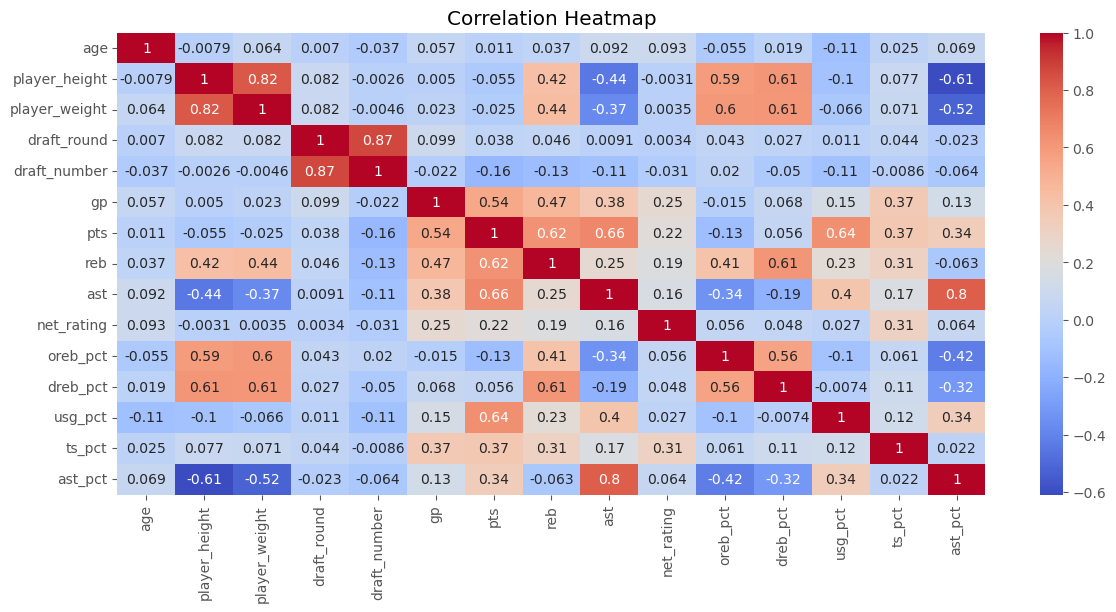

In [16]:
plt.figure(figsize = (14,6))
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Feature Engineering

In [17]:
df['country'].value_counts()

USA                    10721
Canada                   205
France                   190
Australia                100
Spain                     93
                       ...  
Ghana                      1
Trinidad and Tobago        1
Denmark                    1
Colombia                   1
Sudan (UK)                 1
Name: country, Length: 82, dtype: int64

In [18]:
df['country'] = np.where(df['country'] != 'USA', 'Other','USA')

In [19]:
# We create a new column that is the total seasons a player had been playing in the NBA 
df['SeasonsPlayed'] = df.groupby('player_name')['season'].transform('nunique')

In [20]:
# Define a function to extract the start year from the season string
def extract_start_year(season_str):
    return int(season_str[:4])  # Extract the start year from the season string

# Apply the function to the 'Season' column to create a new 'Year' column
df['season'] = df['season'].apply(extract_start_year)

In [21]:
df.head()

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season,SeasonsPlayed
0,Randy Livingston,HOU,22.0,193.04,94.800728,Louisiana State,USA,1996,2,42,64,3.9,1.5,2.4,0.3,0.042,0.071,0.169,0.487,0.248,1996,11
1,Gaylon Nickerson,WAS,28.0,190.50,86.182480,Northwestern Oklahoma,USA,1994,2,34,4,3.8,1.3,0.3,8.9,0.030,0.111,0.174,0.497,0.043,1996,1
2,George Lynch,VAN,26.0,203.20,103.418976,North Carolina,USA,1993,1,12,41,8.3,6.4,1.9,-8.2,0.106,0.185,0.175,0.512,0.125,1996,9
3,George McCloud,LAL,30.0,203.20,102.058200,Florida State,USA,1989,1,7,64,10.2,2.8,1.7,-2.7,0.027,0.111,0.206,0.527,0.125,1996,6
4,George Zidek,DEN,23.0,213.36,119.748288,UCLA,USA,1995,1,22,52,2.8,1.7,0.3,-14.1,0.102,0.169,0.195,0.500,0.064,1996,2


# Exploratory Data Analysis 
### NBA over the Years

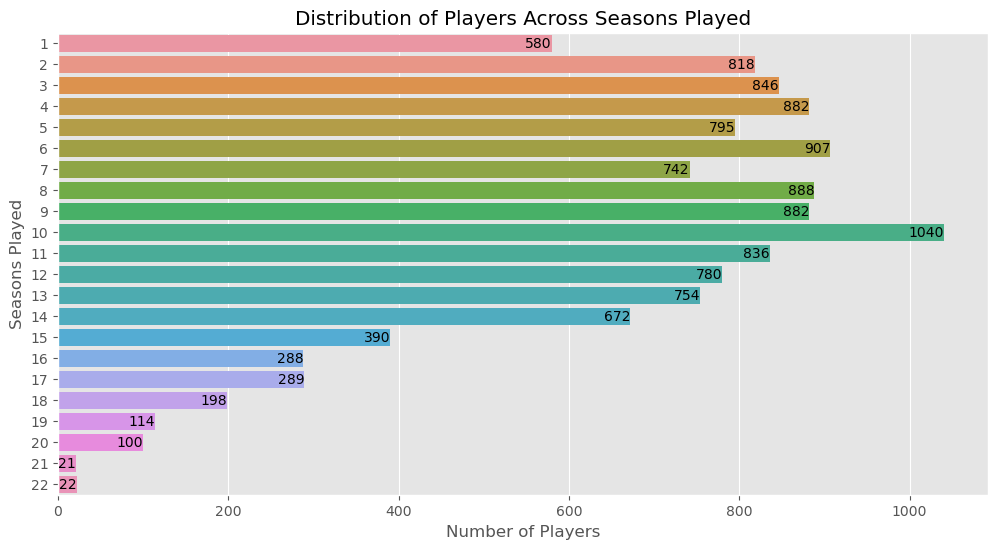

In [22]:
plt.figure(figsize = (12,6))
sns.countplot(data = df, y = df['SeasonsPlayed'])
for index, value in enumerate(df['SeasonsPlayed'].value_counts().sort_index()):
    plt.text(value, index, str(value), ha='right', va='center', fontsize=10, color='black')

plt.title('Distribution of Players Across Seasons Played')
plt.xlabel('Number of Players')
plt.ylabel('Seasons Played')

plt.show()

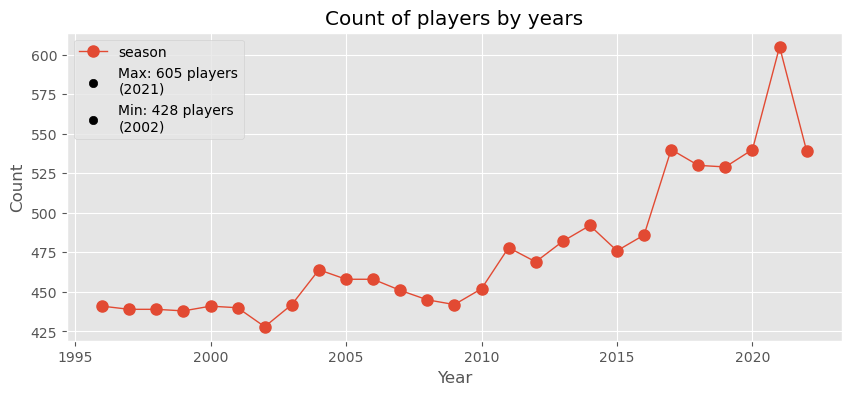

In [23]:
plt.figure(figsize=(10, 4))
df['season'].value_counts().sort_index().plot(marker='o', linestyle='-', markersize=8, linewidth=1)

max_year = df['season'].value_counts().idxmax()
min_year = df['season'].value_counts().idxmin()
max_count = df['season'].value_counts().max()
min_count = df['season'].value_counts().min()

plt.scatter(max_year, max_count, color='black', label=f'Max: {max_count} players\n({max_year})')
plt.scatter(min_year, min_count, color='black', label=f'Min: {min_count} players\n({min_year})')

plt.title('Count of players by years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend()
plt.show()

### Stats by Season 

In [26]:
df.groupby('season').mean().T
# df.groupby('season').max().T

season,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
age,27.963719,28.084282,28.002278,28.107306,28.097506,27.672727,27.530374,27.457014,27.297414,26.890830,26.858079,27.192905,26.943820,27.079186,27.134956,27.089958,27.066098,26.962656,26.981707,27.052521,26.847737,26.524074,26.350943,26.005671,25.994444,26.166942,26.150278
player_height,200.994830,200.619499,200.903007,200.920959,200.752154,201.017909,201.520514,201.315113,201.245733,200.920655,200.704367,200.851486,201.196539,200.873394,201.217832,200.832343,200.769765,200.772946,200.838455,200.949034,200.916790,200.457741,200.535396,198.941059,198.914926,198.350909,199.265121
player_weight,100.526270,100.265530,100.639563,100.735741,100.842450,101.288124,102.032765,101.635395,101.697477,101.340178,101.329284,100.941821,101.393611,101.140341,101.634022,101.055087,100.872778,100.549591,100.438213,100.414022,99.830930,98.811657,98.570677,98.531501,98.240467,97.336345,97.828602
draft_round,1.213152,1.182232,1.132118,1.107306,1.111111,1.097727,1.095794,1.095023,1.086207,1.037118,1.039301,1.062084,1.087640,1.072398,1.088496,1.089958,1.081023,1.060166,1.050813,1.077731,1.037037,0.966667,0.983019,0.973535,0.992593,0.937190,0.972171
draft_number,19.848073,19.419134,18.227790,17.575342,17.893424,17.797727,17.857477,17.929864,17.859914,17.054585,17.305677,17.705100,18.152809,17.972851,18.382743,18.581590,18.311301,18.358921,18.091463,18.409664,17.582305,16.522222,16.681132,16.888469,17.353704,16.552066,16.851577
gp,53.870748,54.671982,33.974943,55.458904,54.356009,54.334091,55.932243,54.056561,53.778017,54.399563,54.772926,55.177384,55.346067,56.133484,55.648230,43.426778,54.918977,53.149378,52.806911,54.785714,53.781893,48.346296,49.247170,42.330813,42.692593,43.039669,48.040816
pts,8.026077,7.947608,7.358542,7.985845,7.811338,7.982727,7.849299,7.745475,8.088147,7.982533,8.208734,8.267184,8.503820,8.571719,8.206195,7.928870,7.957996,8.090249,8.122561,8.349370,8.426749,8.160370,8.613585,8.726465,8.942407,8.240000,9.121336
reb,3.546485,3.516401,3.421412,3.652055,3.619048,3.633636,3.593692,3.583484,3.577802,3.483406,3.503057,3.578049,3.620000,3.657692,3.553982,3.562552,3.522388,3.523859,3.543293,3.620588,3.565226,3.377593,3.613208,3.632703,3.635000,3.446942,3.543228
ast,1.821088,1.819818,1.653759,1.851370,1.823583,1.841136,1.782944,1.758597,1.774138,1.689083,1.766157,1.818847,1.771910,1.804977,1.767699,1.746234,1.808529,1.780498,1.819512,1.826261,1.830247,1.817593,1.921509,1.923629,1.987593,1.868264,2.068831
net_rating,-2.191383,-2.282916,-2.710706,-2.178311,-2.124717,-2.523182,-1.688084,-2.442081,-2.585345,-2.183406,-2.644978,-1.561419,-2.057303,-1.639140,-2.229204,-2.009623,-2.633262,-1.905394,-2.364634,-2.441176,-2.074074,-2.259259,-2.033962,-0.922495,-2.572222,-3.983140,-1.555288


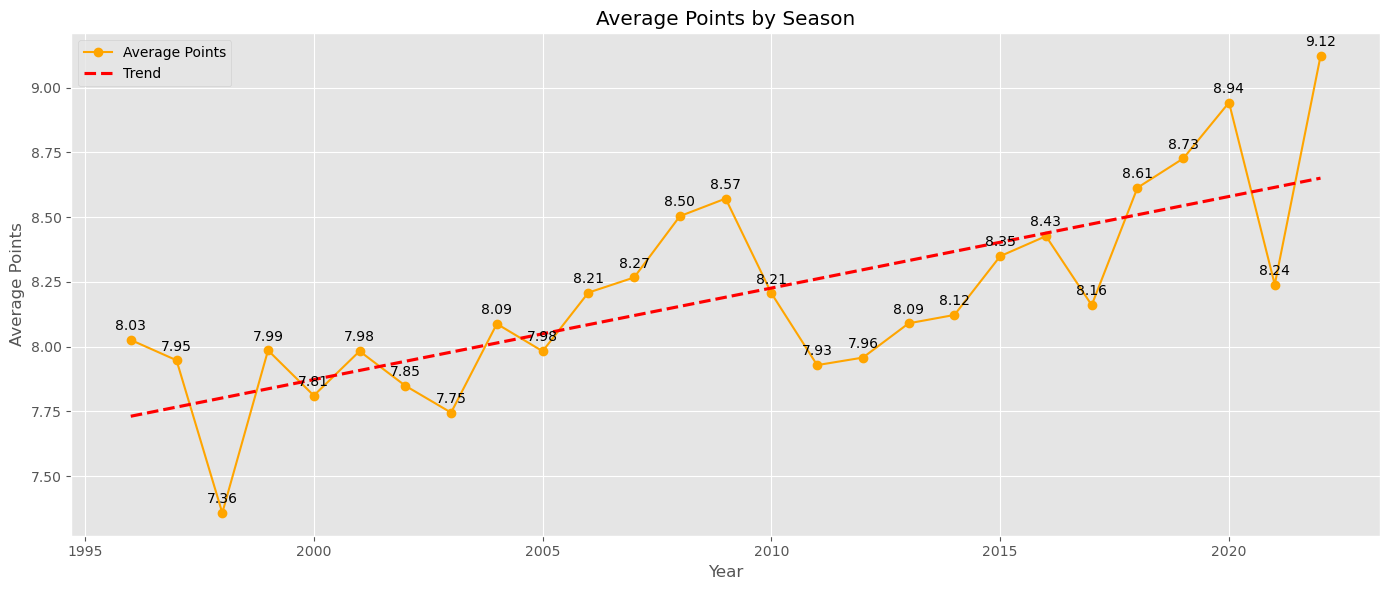

In [27]:
plt.figure(figsize=(14, 6))

# Line plot with average points
plt.plot(df.groupby('season')['pts'].mean(), marker='o', color='orange', label='Average Points', linestyle='-')

# Scatter plot with regression line
sns.regplot(x='season', y='pts', data=df, scatter=False, color='red', line_kws={'linestyle': '--'}, ci = None,label='Trend')

# Annotate each point with the average points
for season, points in df.groupby('season')['pts'].mean().iteritems():
    plt.annotate(f'{points:.2f}', (season, points),
                 textcoords="offset points", xytext=(0, 7), ha='center')

plt.title('Average Points by Season')
plt.xlabel('Year')
plt.ylabel('Average Points')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

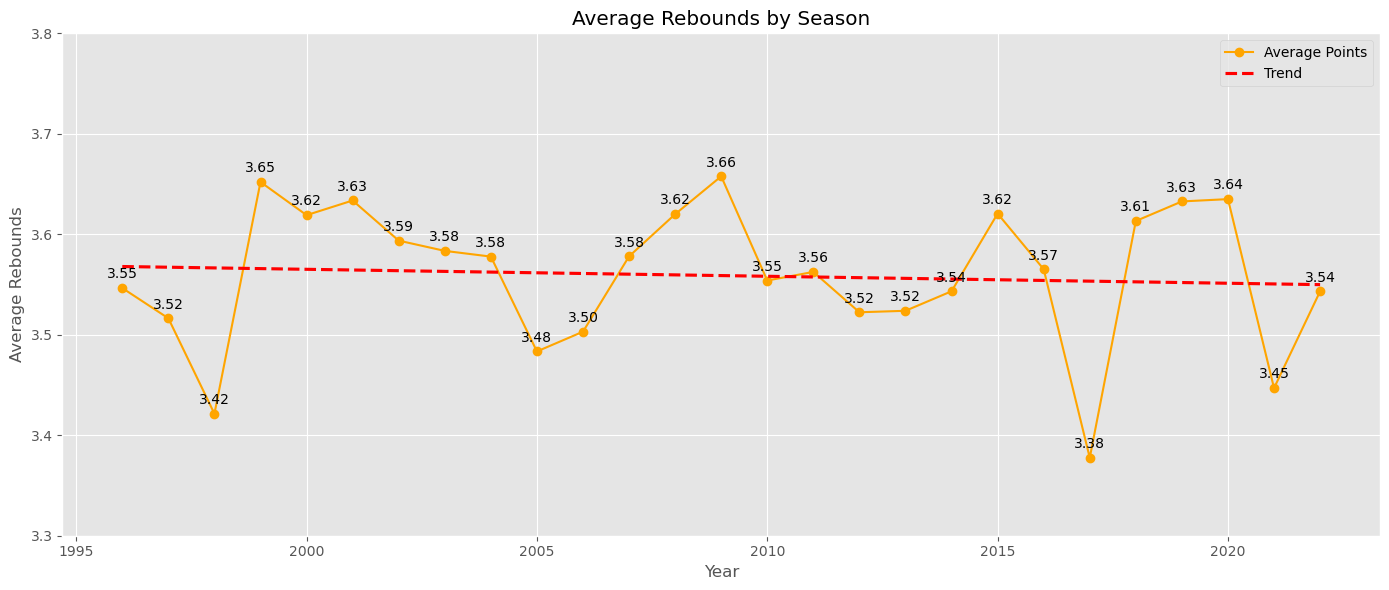

In [28]:
plt.figure(figsize=(14, 6))

# Line plot with average points
plt.plot(df.groupby('season')['reb'].mean(), marker='o', color='orange', label='Average Points', linestyle='-')

# Scatter plot with regression line
sns.regplot(x='season', y='reb', data=df, scatter=False, color='red', line_kws={'linestyle': '--'}, ci = None,label='Trend')
for season, points in df.groupby('season')['reb'].mean().iteritems():
    plt.annotate(f'{points:.2f}', (season, points),
                 textcoords="offset points", xytext=(0, 7), ha='center')
plt.title('Average Rebounds by Season')
plt.xlabel('Year')
plt.ylabel('Average Rebounds')
plt.grid(True)
plt.legend()
plt.ylim(3.3,3.8)
plt.tight_layout()
plt.show()

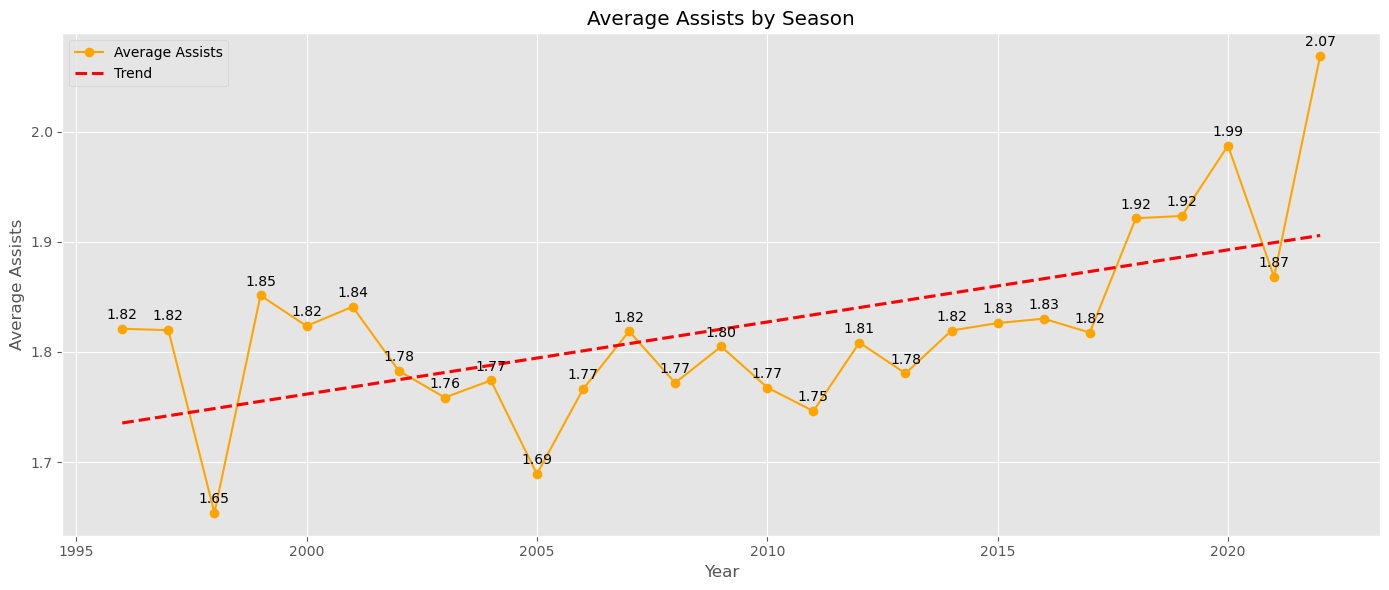

In [29]:
plt.figure(figsize=(14, 6))

# Line plot with average points
plt.plot(df.groupby('season')['ast'].mean(), marker='o', color='orange', label='Average Assists', linestyle='-')

# Scatter plot with regression line
sns.regplot(x='season', y='ast', data=df, scatter=False, color='red', line_kws={'linestyle': '--'}, ci = None,label='Trend')
for season, points in df.groupby('season')['ast'].mean().iteritems():
    plt.annotate(f'{points:.2f}', (season, points),
                 textcoords="offset points", xytext=(0, 7), ha='center')
plt.title('Average Assists by Season')
plt.xlabel('Year')
plt.ylabel('Average Assists')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

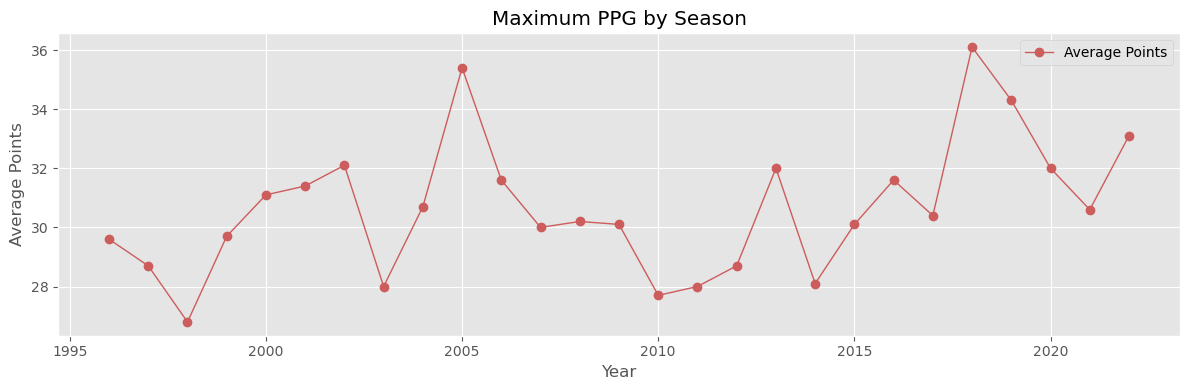

In [30]:
plt.figure(figsize=(12, 4))

# Line plot with average points
plt.plot(df.groupby('season')['pts'].max(), marker='o', label='Average Points', linestyle='-', markersize=6, linewidth=1,color = 'indianred')

# Annotate each point with the average points
#for season, points in df.groupby('season')['pts'].max().iteritems():
#    plt.annotate(f'{points:.2f}', (season, points),
#                 textcoords="offset points", xytext=(0, 7), ha='center')

plt.title('Maximum PPG by Season')
plt.xlabel('Year')
plt.ylabel('Average Points')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

### Assist Percentage helps evaluate a player's passing skills

In [31]:
pass_skills = df.sort_values(by = 'ast_pct', ascending = False)[df['gp'] > 10]
pass_skills1 = pass_skills[['player_name','ast_pct','ast','season']].head(13)
pass_skills1

,player_name,ast_pct,ast,season
9309,Russell Westbrook,0.543,10.4,2016
5732,Chris Paul,0.512,11.0,2008
9457,James Harden,0.505,11.2,2016
5060,Chris Paul,0.500,11.6,2007
7062,Rajon Rondo,0.498,11.7,2011
6445,Steve Nash,0.498,11.4,2010
8828,Chris Paul,0.493,10.0,2015
7113,Steve Nash,0.491,10.7,2011
7227,Rajon Rondo,0.490,11.1,2012
2600,Andre Miller,0.484,10.9,2001


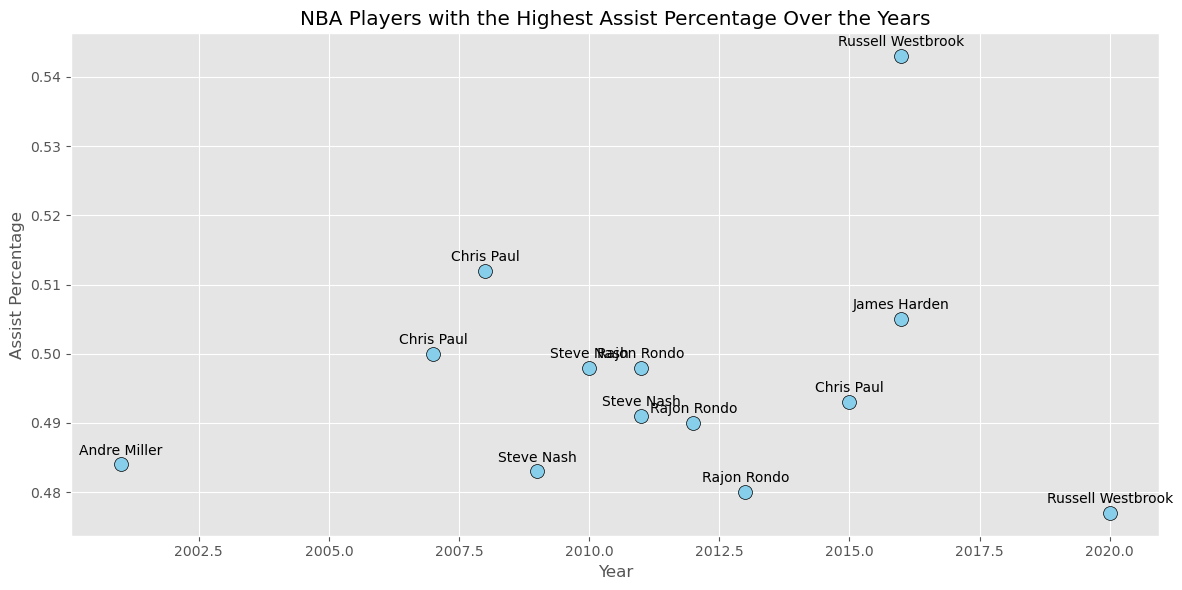

In [32]:
# Plotting as a scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(pass_skills1['season'], pass_skills1['ast_pct'], s=100, color='skyblue', edgecolors='black')

# Annotate each point with the player's name
for i, player in enumerate(pass_skills1['player_name']):
    plt.annotate(player, (pass_skills1['season'].iloc[i], pass_skills1['ast_pct'].iloc[i]),
                 textcoords="offset points", xytext=(0, 7), ha='center')

plt.xlabel('Year')
plt.ylabel('Assist Percentage')
plt.title('NBA Players with the Highest Assist Percentage Over the Years')
#plt.ylim(30, 37.0)  # Set the y-axis limits
plt.grid(True)
plt.tight_layout()
plt.show()

### Which NBA players had the best scoring seasons in the last 25 years ?

In [33]:
best_scoring_seasons = df.sort_values(by = ['pts','ast'], ascending = [False,False]).head(15)

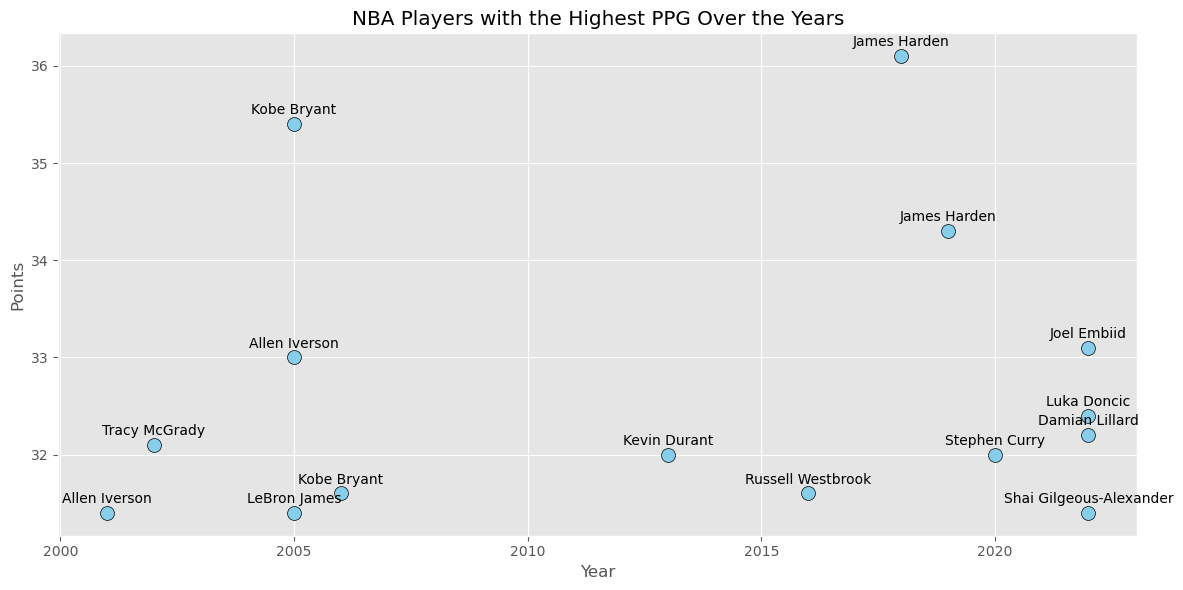

                          pts   reb   ast  draft_number
player_name                                            
James Harden             36.1   6.6   7.5             3
Kobe Bryant              35.4   5.3   4.5            13
James Harden             34.3   6.6   7.5             3
Joel Embiid              33.1  10.2   4.2             3
Allen Iverson            33.0   3.2   7.4             1
Luka Doncic              32.4   8.6   8.0             3
Damian Lillard           32.2   4.8   7.3             6
Tracy McGrady            32.1   6.5   5.5             9
Stephen Curry            32.0   5.5   5.8             7
Kevin Durant             32.0   7.4   5.5             2
Russell Westbrook        31.6  10.7  10.4             4
Kobe Bryant              31.6   5.7   5.4            13
LeBron James             31.4   7.0   6.6             1
Allen Iverson            31.4   4.5   5.5             1
Shai Gilgeous-Alexander  31.4   4.8   5.5            11


In [35]:

# Plotting as a scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(best_scoring_seasons['season'], best_scoring_seasons['pts'], s=100, color='skyblue', edgecolors='black')

# Annotate each point with the player's name
for i, player in enumerate(best_scoring_seasons['player_name']):
    plt.annotate(player, (best_scoring_seasons['season'].iloc[i], best_scoring_seasons['pts'].iloc[i]),
                 textcoords="offset points", xytext=(0, 7), ha='center')

plt.xlabel('Year')
plt.ylabel('Points')
plt.title('NBA Players with the Highest PPG Over the Years')
#plt.ylim(30, 37.0)  # Set the y-axis limits
plt.grid(True)
plt.tight_layout()
plt.show()

print(best_scoring_seasons[['player_name','pts','reb','ast','draft_number']].set_index('player_name'))

# Player's Individual Stats

# Feature Engineering

In [36]:
df1 = df.groupby('player_name').mean()
df1.head()

,age,player_height,player_weight,draft_round,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season,SeasonsPlayed
player_name,,,,,,,,,,,,,,,,,
A.C. Green,35.0,205.74,102.058200,1.0,23.0,75.800000,5.78,6.06,0.860000,-1.88,0.093000,0.1864,0.1274,0.4868,0.054,1998.0,5.0
A.J. Bramlett,23.0,208.28,102.965384,2.0,39.0,8.000000,1.00,2.80,0.000000,-32.60,0.158000,0.2080,0.1460,0.1900,0.000,1999.0,1.0
A.J. Guyton,24.0,185.42,81.646560,2.0,32.0,26.666667,3.80,0.70,1.566667,-6.70,0.013333,0.0400,0.2240,0.3240,0.282,2001.0,3.0
A.J. Lawson,22.0,198.12,81.192968,0.0,0.0,15.000000,3.70,1.40,0.100000,-20.10,0.046000,0.1520,0.1890,0.5890,0.032,2022.0,1.0
AJ Green,23.0,195.58,86.182480,0.0,0.0,35.000000,4.40,1.30,0.600000,-4.90,0.016000,0.1050,0.1590,0.6070,0.092,2022.0,1.0


In [37]:
df1.drop('season', axis = 1, inplace = True)

In [38]:
df1.drop('age', axis = 1, inplace = True)

In [39]:
print(f'Original Dataset: {df.shape}')
print(f'New Dataset: {df1.shape}')

Original Dataset: (12844, 22)
New Dataset: (2551, 15)


In [40]:
scoring = round(df1['pts'].quantile(0.9),2)
rebounding = round(df1['reb'].quantile(0.9),2)
passing = round(df1['ast'].quantile(0.9),2)

print(f'Top 10 % Scoring Low: {scoring}')
print(f'Top 10 % Rebounding Low: {rebounding}')
print(f'Top 10 % Passing Low: {passing}')

Top 10 % Scoring Low: 12.23
Top 10 % Rebounding Low: 5.23
Top 10 % Passing Low: 3.02


In [41]:
# Create a new columns that categorizes if a player was/is in all star level based on the above metrics:
df1['all_star'] = np.where(((df1['pts'] > scoring) & (df1['reb'] > rebounding)) | ((df1['pts'] > scoring) & (df1['ast'] > passing)), 'Yes', 'No')
df1.head()

,player_height,player_weight,draft_round,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,SeasonsPlayed,all_star
player_name,,,,,,,,,,,,,,,,
A.C. Green,205.74,102.058200,1.0,23.0,75.800000,5.78,6.06,0.860000,-1.88,0.093000,0.1864,0.1274,0.4868,0.054,5.0,No
A.J. Bramlett,208.28,102.965384,2.0,39.0,8.000000,1.00,2.80,0.000000,-32.60,0.158000,0.2080,0.1460,0.1900,0.000,1.0,No
A.J. Guyton,185.42,81.646560,2.0,32.0,26.666667,3.80,0.70,1.566667,-6.70,0.013333,0.0400,0.2240,0.3240,0.282,3.0,No
A.J. Lawson,198.12,81.192968,0.0,0.0,15.000000,3.70,1.40,0.100000,-20.10,0.046000,0.1520,0.1890,0.5890,0.032,1.0,No
AJ Green,195.58,86.182480,0.0,0.0,35.000000,4.40,1.30,0.600000,-4.90,0.016000,0.1050,0.1590,0.6070,0.092,1.0,No


# Exploratory Data Analysis

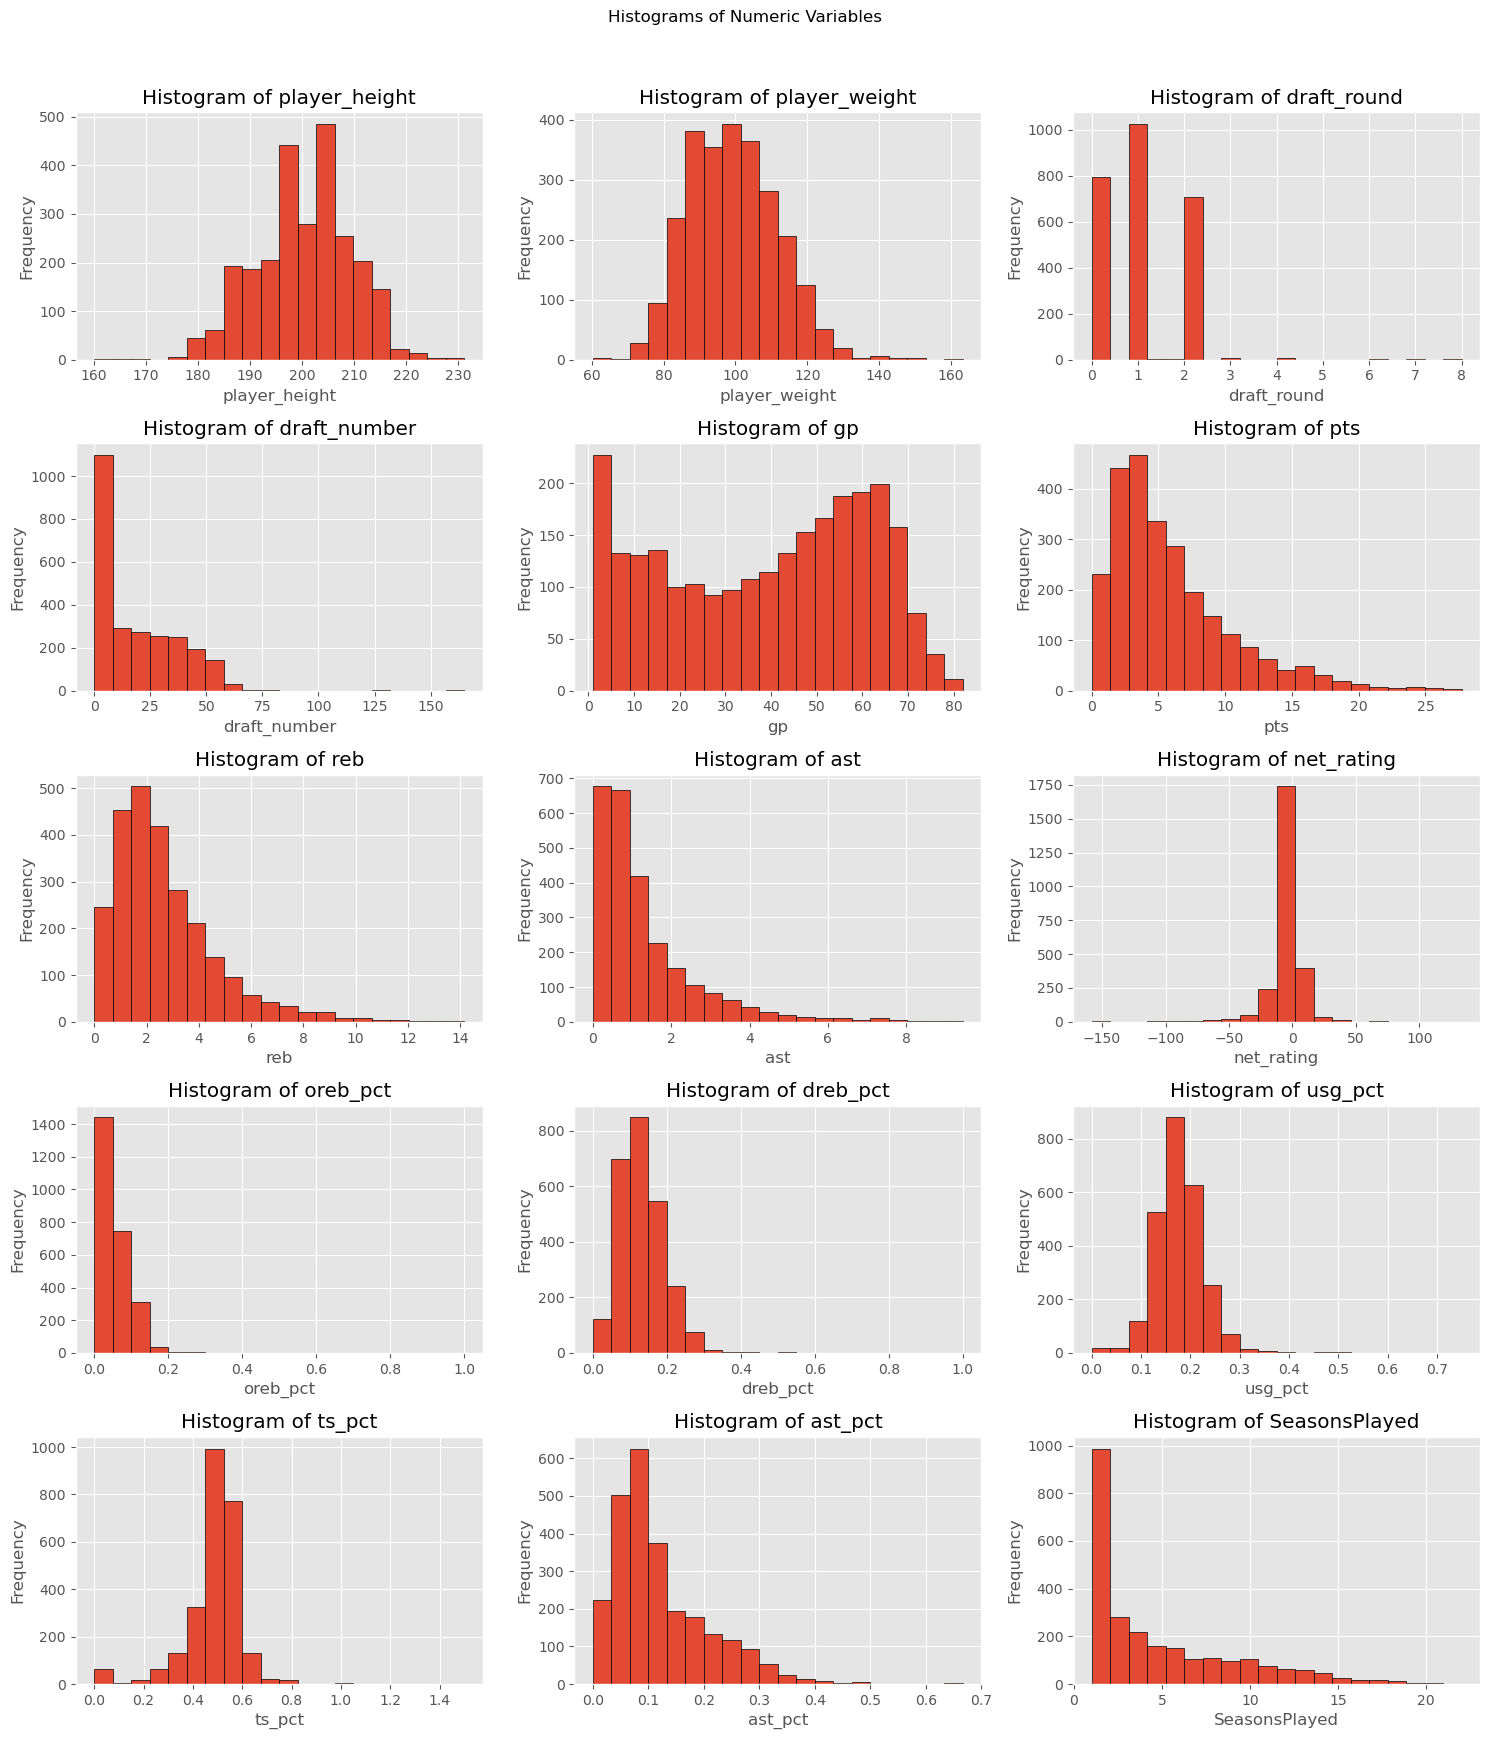

In [42]:
numeric_columns = df1.select_dtypes(include='number')

# Create subplots with 7 rows and 3 columns
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 17))
fig.suptitle('Histograms of Numeric Variables', y=1.02)

# Flatten the axes to iterate over them
axes = axes.flatten()

# Iterate over numeric columns and create histograms
for i, column in enumerate(numeric_columns.columns):
    axes[i].hist(numeric_columns[column], bins = 20, edgecolor = 'black')
    axes[i].set_title(f'Histogram of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

# Hide any remaining empty subplots
for i in range(len(numeric_columns.columns), len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

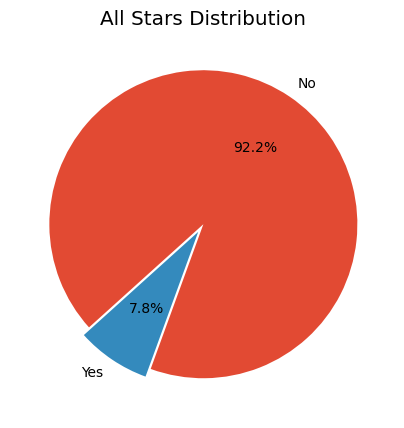

In [43]:
all_star_counts = df1['all_star'].value_counts()
expand = [0.01, 0.05]
# Create a pie chart with labels
plt.figure(figsize=(5, 5))
colors = plt.cm.Paired(range(len(all_star_counts)))

pie_chart = plt.pie(all_star_counts, labels=all_star_counts.index, autopct='%1.1f%%', startangle=250, explode = expand)
plt.title('All Stars Distribution')

# Add labels to each wedge
for text in pie_chart[1]:
    text.set_size(10)

plt.show()

## Most Dominant Players

In [44]:
df1.reset_index(inplace = True)

In [45]:
dom = df1[(df1['pts'] > 20) & (df1['reb'] > 9)].sort_values(by = 'pts', ascending = False)

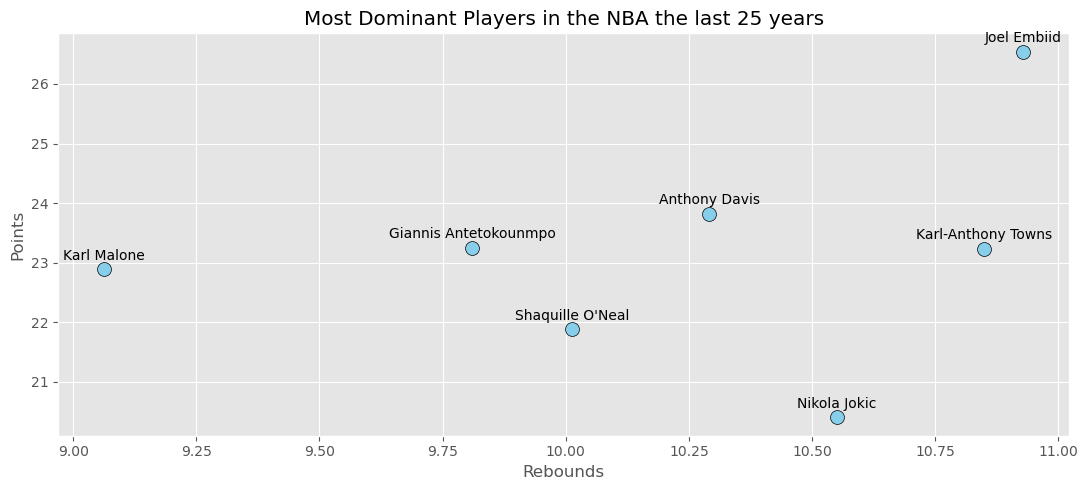

In [46]:
plt.figure(figsize = (11,5))
plt.scatter(dom['reb'],dom['pts'], s = 100, color='skyblue', edgecolors='black')
for i, player in enumerate(dom['player_name']):
    plt.annotate(player, (dom['reb'].iloc[i], dom['pts'].iloc[i]),
                 textcoords="offset points", xytext=(0, 7), ha='center')

plt.xlabel('Rebounds')
plt.ylabel('Points')
plt.title('Most Dominant Players in the NBA the last 25 years')
plt.grid(True)
plt.tight_layout()
plt.show()

## Best Scorers - Playmakers 

In [47]:
scor_pass = df1[(df1['pts'] > 20) & (df1['ast'] > 5)]

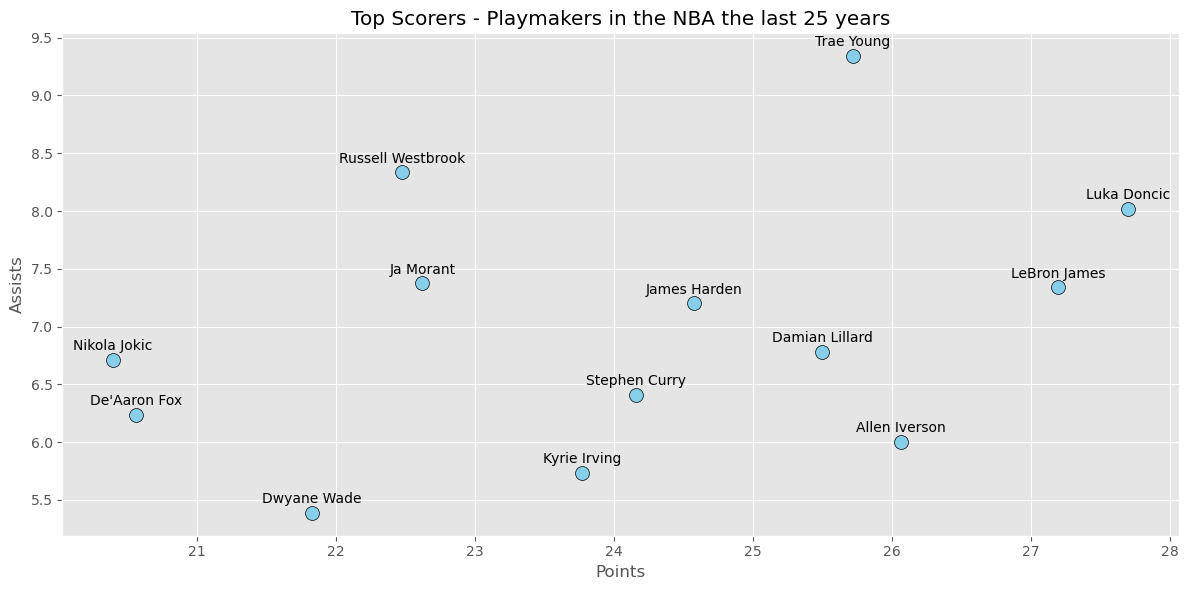

In [48]:
plt.figure(figsize = (12,6))
plt.scatter(x = scor_pass['pts'],y = scor_pass['ast'], s = 100, color='skyblue', edgecolors='black')
for i, player in enumerate(scor_pass['player_name']):
    plt.annotate(player, (scor_pass['pts'].iloc[i], scor_pass['ast'].iloc[i]),
                 textcoords="offset points", xytext=(0, 7), ha='center')

plt.xlabel('Points')
plt.ylabel('Assists')
plt.title('Top Scorers - Playmakers in the NBA the last 25 years')
plt.grid(True)
plt.tight_layout()
plt.show()

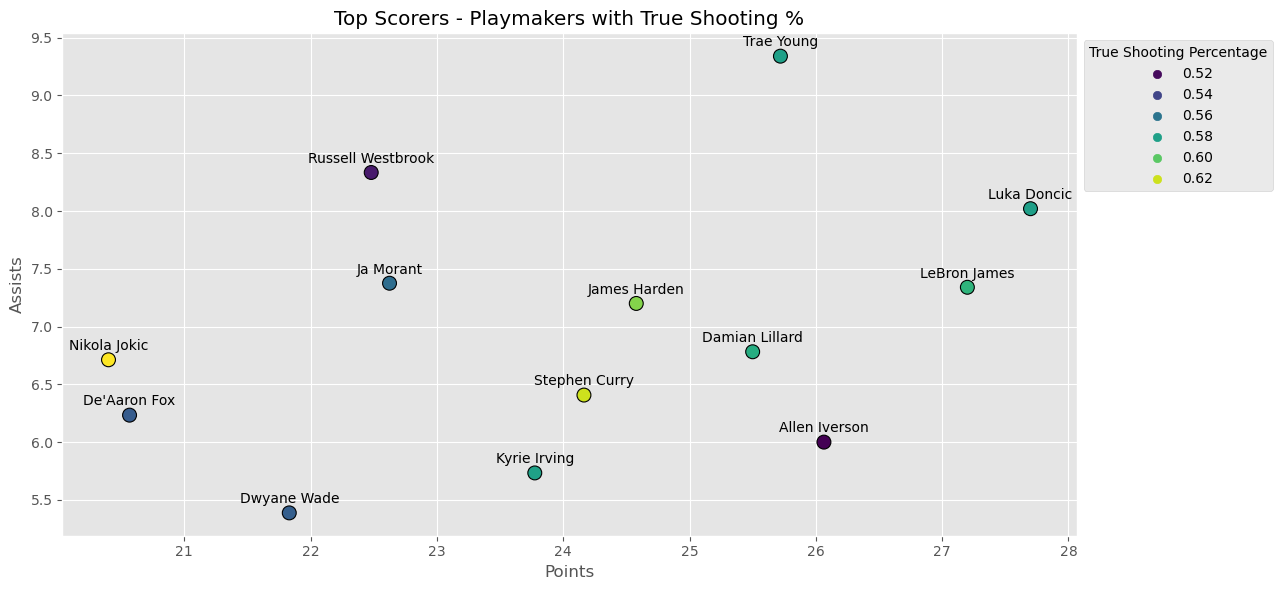

In [49]:
plt.figure(figsize=(11, 6))

# Assuming scor_pass is your DataFrame
scatterplot = sns.scatterplot(x='pts', y='ast', hue='ts_pct', data=scor_pass, s=100, palette='viridis', edgecolor='black')

for i, player in enumerate(scor_pass['player_name']):
    plt.annotate(player, (scor_pass['pts'].iloc[i], scor_pass['ast'].iloc[i]),
                 textcoords="offset points", xytext=(0, 7), ha='center')

plt.xlabel('Points')
plt.ylabel('Assists')
plt.title('Top Scorers - Playmakers with True Shooting %')
plt.grid(True)
plt.tight_layout()

# Move the legend outside the plot for better visibility
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', title='True Shooting Percentage')

plt.show()

## Most Impactful Players

###       Net Rating : When referring to a player's net rating, it usually involves the point differential when that player is on the court per 100 possessions
###       Net Rating=Offensive Rating−Defensive Rating 

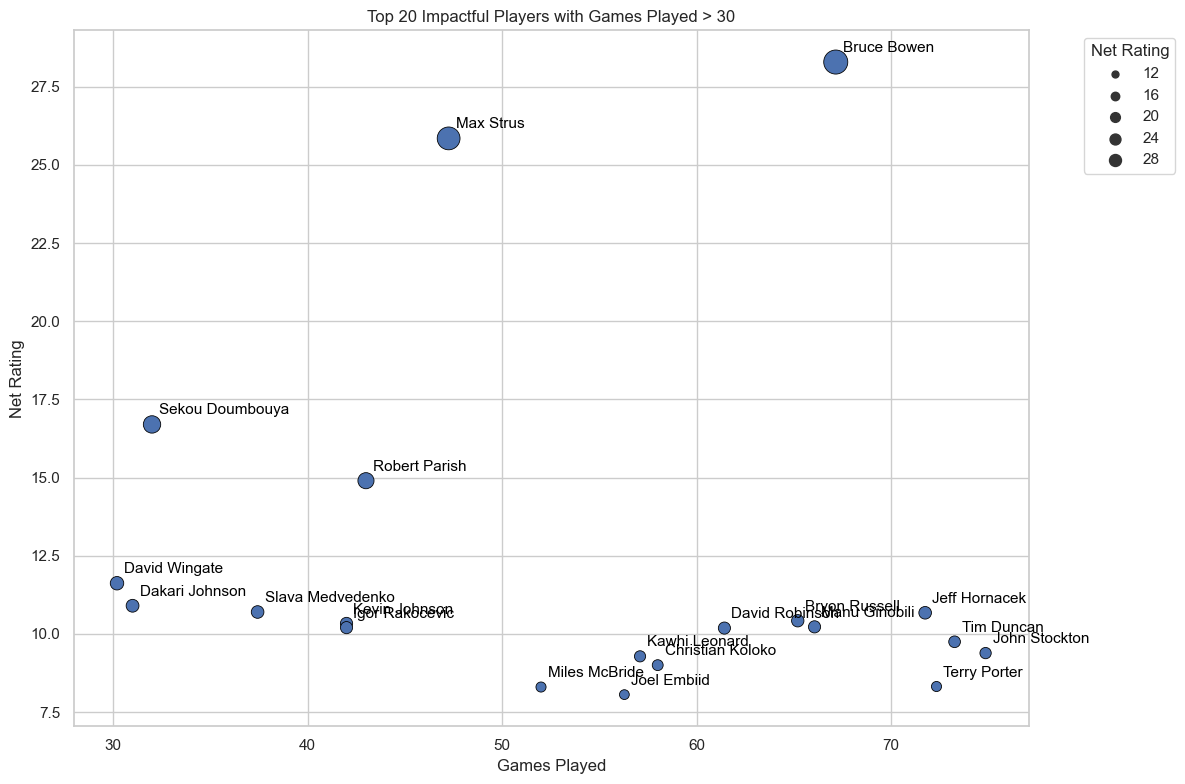

In [50]:
# Assuming df1 is your DataFrame
impact_players = df1[df1['gp'] > 30].sort_values(by='net_rating', ascending=False).head(20)

# Set Seaborn style
sns.set(style="whitegrid")

# Create a scatter plot with Seaborn
plt.figure(figsize=(12, 8))
scatter_plot = sns.scatterplot(x='gp', y='net_rating', data=impact_players, size='net_rating', sizes=(50, 300), palette='viridis', edgecolor='black')

# Add labels and title
plt.xlabel('Games Played')
plt.ylabel('Net Rating')
plt.title('Top 20 Impactful Players with Games Played > 30')

# Annotate player names
for i, player in enumerate(impact_players['player_name']):
    plt.annotate(player, (impact_players['gp'].iloc[i], impact_players['net_rating'].iloc[i]),
                 textcoords="offset points", xytext=(5, 5), ha='left', va='bottom', fontsize=11, color='black')

# Customize legend
plt.legend(title='Net Rating', bbox_to_anchor=(1.05, 1), loc='upper left', markerscale=0.5)

# Show the plot
plt.tight_layout()
plt.show()

## True Shooting Percentage: TS = PTS / (2*(FGA + 0.44 * FTA))

In [51]:
shooters = df1[df1['gp'] > 30].sort_values(by = 'ts_pct', ascending = False).head(10)

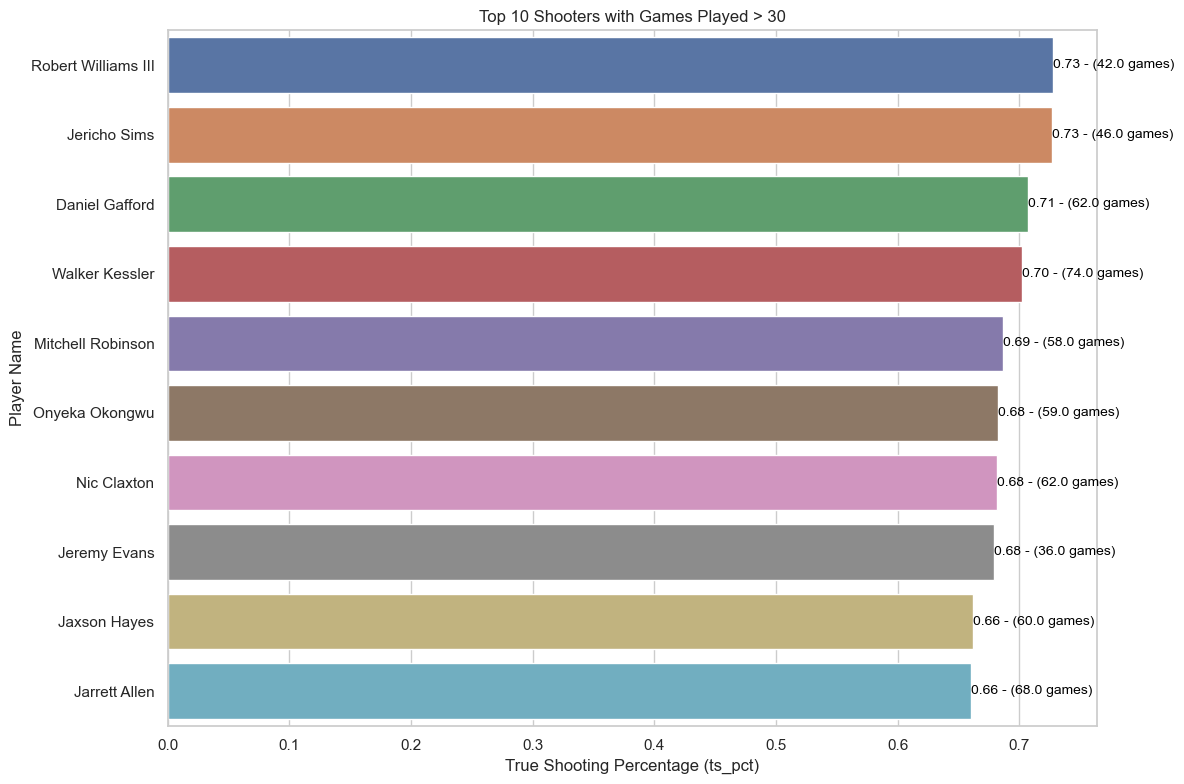

In [55]:
plt.figure(figsize=(12, 8))
bar_plot = sns.barplot(x='ts_pct', y='player_name', data=shooters)

for index, value in enumerate(shooters['ts_pct']):
    plt.text(value, index, f"{value:.2f} - ({np.round(shooters['gp'].iloc[index])} games)",
             ha='left', va='center', fontsize=10, color='black')

plt.xlabel('True Shooting Percentage (ts_pct)')
plt.ylabel('Player Name')
plt.title('Top 10 Shooters with Games Played > 30')

plt.tight_layout()
plt.show()